<a href="https://colab.research.google.com/github/utkarshg1/DL-2pm-4pm-Weekend/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

### Step 1: Read the data

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature here is PE (Power Plant Energy output)

### Step 2 - Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

### Step 3: Seperate X and Y(PE)

In [7]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Create a Preprocessing Pipeline for X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


### Step 5: Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [17]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [18]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [19]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [20]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Step 5: Build the Keras neural network
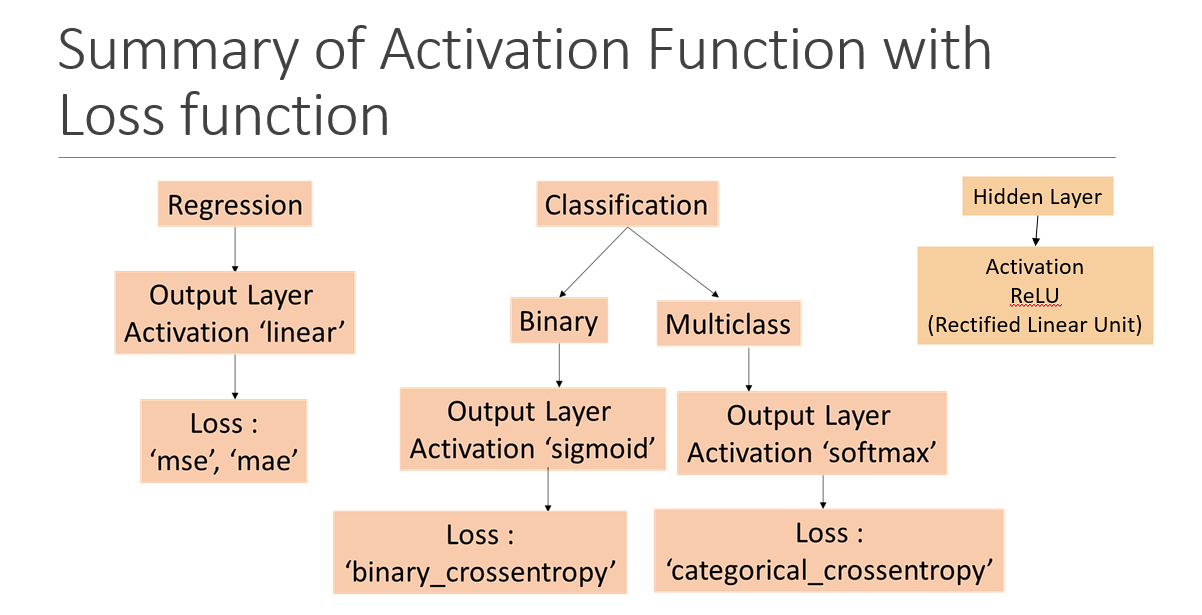

In [22]:
xtrain.shape[1]

4

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [23]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [26]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 205863.2656 - mae: 453.3631 - val_loss: 203826.3750 - val_mae: 451.0714
Epoch 2/100
192/192 [==============================] - 1s 3ms/step - loss: 202351.8438 - mae: 449.3459 - val_loss: 198616.4062 - val_mae: 445.0404
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 194717.7031 - mae: 440.3776 - val_loss: 187830.7188 - val_mae: 432.1325
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 180498.6719 - mae: 422.8981 - val_loss: 169686.4375 - val_mae: 409.0565
Epoch 5/100
192/192 [==============================] - 1s 5ms/step - loss: 159341.5312 - mae: 394.6957 - val_loss: 145444.2656 - val_mae: 374.9049
Epoch 6/100
192/192 [==============================] - 1s 3ms/step - loss: 133722.3750 - mae: 356.0791 - val_loss: 118771.3984 - val_mae: 331.2181
Epoch 7/100
192/192 [==============================] - 1s 3ms/step - loss: 107775.4453 - mae: 310.1837 - val_loss: 940

### Evaluate the model in train and test

In [27]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 20.6441 - mae: 3.5802


[20.644075393676758, 3.580164670944214]

In [28]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 3ms/step - loss: 18.9902 - mae: 3.4705


[18.9902400970459, 3.470540761947632]